## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = '09_26_18_tissue_study'
bucket = 'hpontes.data'

vids = 5
types = ['10K', '5K', '1K', 'COOH']
slices = [1, 2, 3, 4, 5, 6]
counter = 0
for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            try:
                #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                filename = 'features_{}_tissue_S{}_XY{}.csv'.format(typ, slic, num)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skipped filename: {}'.format(filename))

features_10K_tissue_S1_XY1.csv
features_10K_tissue_S1_XY2.csv
features_10K_tissue_S1_XY3.csv
features_10K_tissue_S1_XY4.csv
features_10K_tissue_S1_XY5.csv
features_10K_tissue_S2_XY1.csv
features_10K_tissue_S2_XY2.csv
features_10K_tissue_S2_XY3.csv
features_10K_tissue_S2_XY4.csv
features_10K_tissue_S2_XY5.csv
features_10K_tissue_S3_XY1.csv
features_10K_tissue_S3_XY2.csv
features_10K_tissue_S3_XY3.csv
features_10K_tissue_S3_XY4.csv
features_10K_tissue_S3_XY5.csv
features_10K_tissue_S4_XY1.csv
features_10K_tissue_S4_XY2.csv
features_10K_tissue_S4_XY3.csv
features_10K_tissue_S4_XY4.csv
features_10K_tissue_S4_XY5.csv
features_10K_tissue_S5_XY1.csv
features_10K_tissue_S5_XY2.csv
features_10K_tissue_S5_XY3.csv
features_10K_tissue_S5_XY4.csv
features_10K_tissue_S5_XY5.csv
features_10K_tissue_S6_XY1.csv
features_10K_tissue_S6_XY2.csv
features_10K_tissue_S6_XY3.csv
features_10K_tissue_S6_XY4.csv
features_10K_tissue_S6_XY5.csv
features_5K_tissue_S1_XY1.csv
features_5K_tissue_S1_XY2.csv
features_5

In [16]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [17]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3', '4', '5', '6'])]
X_test = pcadataset.final[pcadataset.final['Slices']=='1']
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3', '4', '5', '6'])][featofvar]
y_test = pcadataset.final[pcadataset.final['Slices']=='1'][featofvar]

In [94]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-2.28302809 -0.46673724  0.85919291]


In [69]:
types = ['COOH', '1K', '10K', '5K']

In [80]:
types = ['COOH', '5K', '1K', '10K']

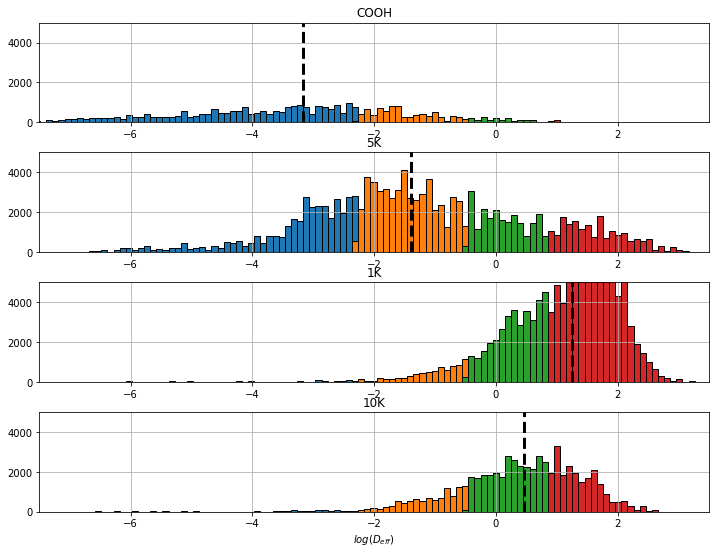

In [100]:
import matplotlib.pyplot as plt
Dbins = [-10, -2.283, -0.467, 0.859, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
#types = types_order
for ax in axes:
    means.append(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Particle Type']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 5000])
    ax.axvline(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

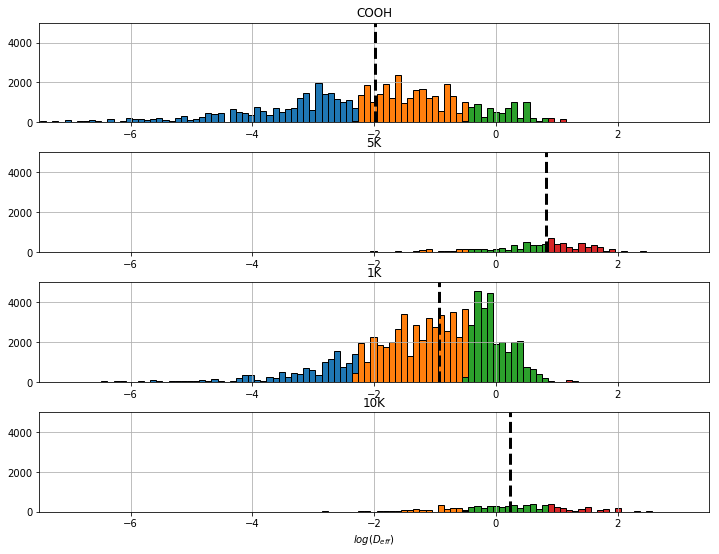

In [99]:
#Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 5000])
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [43]:
newmap = cm.viridis(np.linspace(0.9, 0.0, 4))
labels3 = ['PS-PEG(1k)', 'PS-PEG(10k)', 'PS-PEG(5k)', 'PS-COOH']
types = ['1K', '10K', '5K', 'COOH']

newmap[2, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[3, :]
newmap[1, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[2, :]
newmap[3, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[1, :]

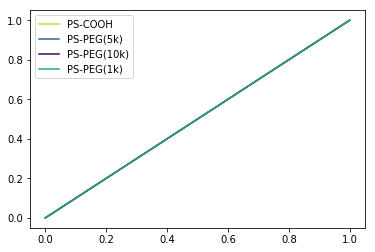

In [44]:
for i, mw in enumerate(types):
    plt.plot([0,1], [0,1], c=newmap[i], label=labels3[3-i])
    plt.legend()

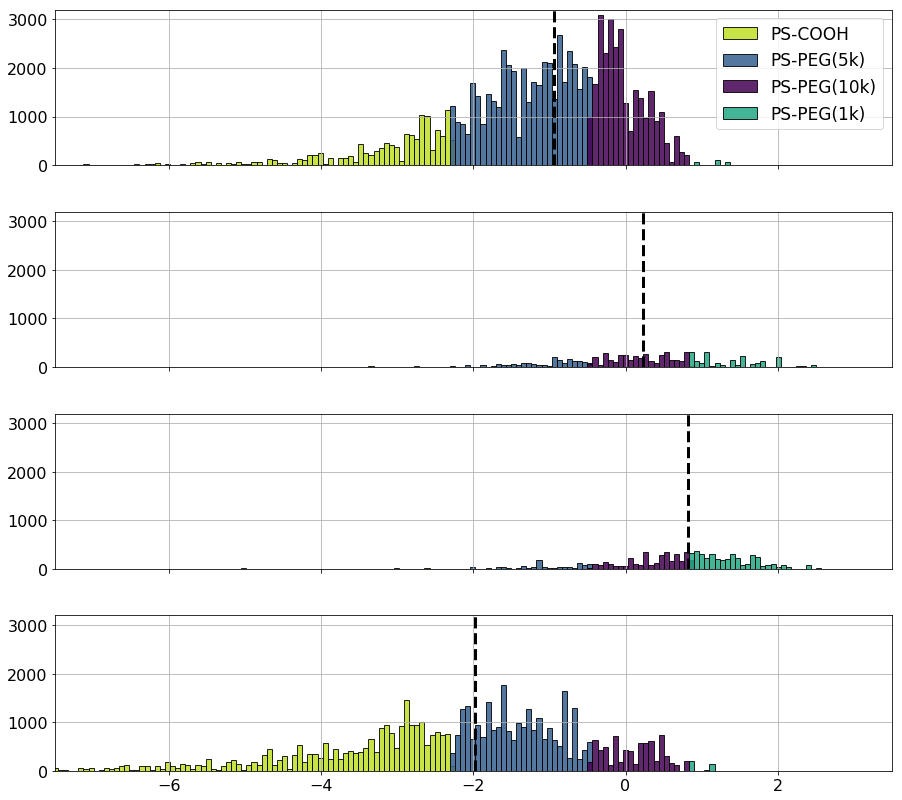

In [45]:
from matplotlib.pyplot import cm
Dbins = [-10, -2.283, -0.467, 0.859, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(15, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(15,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 3200])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    #ax.set_yticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/tissue_mw_hist.png', dpi=300, pad_inches=0.1)

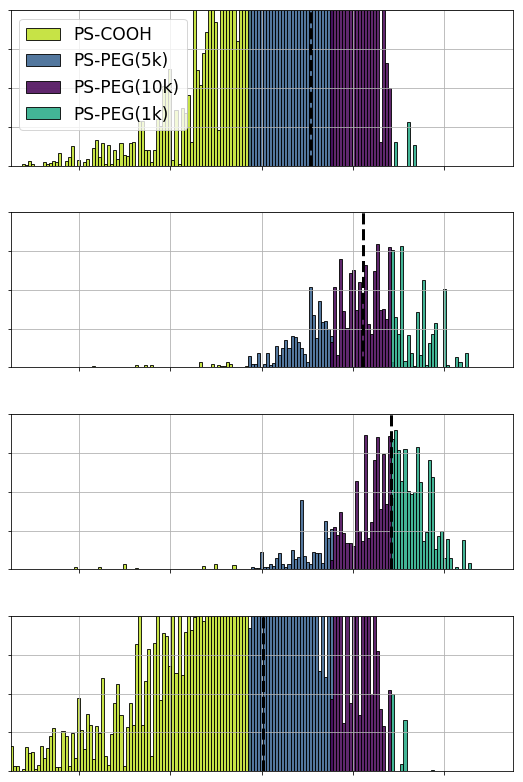

In [47]:
from matplotlib.pyplot import cm
Dbins = [-10, -2.283, -0.467, 0.859, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(9, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(9,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 400])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/tissue_mw_hist_small.png', dpi=300, pad_inches=0.1)

In [31]:
from sklearn.metrics import classification_report

In [97]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=Dbins, labels=types).astype(str))
y_true2 = X_train['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        10K     0.1761    0.3247    0.2284     65307
         1K     0.4109    0.2770    0.3310    131068
         5K     0.6642    0.3751    0.4794    134334
       COOH     0.3745    0.6744    0.4816     33812
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4588    0.3586    0.3813    364521



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [98]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=Dbins, labels=types).astype(str))
y_true2 = X_test['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

        10K     0.3036    0.2230    0.2571      8628
         1K     0.6577    0.3200    0.4305     85472
         5K     0.0139    0.1099    0.0247      9165
       COOH     0.6471    0.4217    0.5107     56022
        nan     0.0000    0.0000    0.0000         0

avg / total     0.5978    0.3384    0.4260    159287



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
fstats_tot['LogDeff1'] = np.log(fstats_tot.Deff1).replace([np.inf, -np.inf], np.nan)

In [ ]:
axes = fstats_tot.hist(column='LogDeff1', by='Region and Type', layout=(6, 1), bins=100, sharex=True, sharey=True,
                        figsize=(10, 8), edgecolor='k')

means = []
types2 = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for ax, typ in zip(axes, types2):
    ax.set_ylim([0,8000])
    #ax.set_xscale("log", nonposx='clip')
    ax.set_xlim([-7.5,2.5])
    means.append(fstats_tot[fstats_tot['Region and Type']==typ]['LogDeff1'].median())
    ax.axvline(fstats_tot[fstats_tot['Region and Type']==typ]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.842, -0.037, 0.516, 0.891, 1.29, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(6):
    fstats_tot[(fstats_tot['Particle Type']=='PEG'(Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [ ]:
from sklearn.metrics import classification_report
y_pred2 = list(pd.cut(fstats_tot.LogDeff1, bins=Dbins, labels=types2).astype(str))
y_true = fstats_tot['Region and Type'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.891, 1.29, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    fstats_tot[(fstats_tot['Particle Type']=='PEG') & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [ ]:
y_pred2 = list(pd.cut(fstats_tot[fstats_tot['Particle Type']=='PEG'].LogDeff1, bins=Dbins, labels=['Hippocampus', 'Cortex', 'Thalamus']).astype(str))
y_true = fstats_tot[fstats_tot['Particle Type']=='PEG']['Region'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.842, -0.037, 10]
bins = np.linspace(-10, 10, 300)
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    fstats_tot[(fstats_tot['Particle Type']=='PS') & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(4, 8), edgecolor='k', ax=ax)
ax.set_xlim([-7.5, 2.5])

In [ ]:
y_pred2 = list(pd.cut(fstats_tot[fstats_tot['Particle Type']=='PS'].LogDeff1, bins=Dbins, labels=['Hippocampus', 'Cortex', 'Thalamus']).astype(str))
y_true = fstats_tot[fstats_tot['Particle Type']=='PS']['Region'].tolist()
print(classification_report(y_true, y_pred2, digits=4))

In [ ]:
Dbins

In [ ]:
fstats_tot.to_csv('features.csv')

In [ ]:
#with equal sample sizes for each particle type
import random
counter = 0
#mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    fstats_type = fstats_tot[fstats_tot['R Type']==mw].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 34000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

In [3]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices',
          'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [ ]:
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    print(fstats_tot[fstats_tot['Region and Type'] == mw].shape)

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [3]:
ncomp = 14
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices',
          'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.2943047074762938
1 component: 0.41974423031832414
2 component: 0.4916267310326605
3 component: 0.5507682919480987
4 component: 0.6056667772705364
5 component: 0.6421813597559524
6 component: 0.6755929910249859
7 component: 0.7020577441794293
8 component: 0.7261088646067491
9 component: 0.7480718402457309
10 component: 0.7686194654536886
11 component: 0.7866931377180231
12 component: 0.8042895874807542
13 component: 0.8206502242732131


In [5]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object

In [8]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [6]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Mean Deff1,Std efficiency,asymmetry2,Std asymmetry2,Mean asymmetry1,trappedness,straightness,trappedness,Std MSD_ratio,Std kurtosis,Std MSD_ratio,D_fit,kurtosis,Std AR
1,Std frames,Std straightness,asymmetry3,Std asymmetry1,Mean asymmetry2,boundedness,efficiency,boundedness,Mean MSD_ratio,Mean kurtosis,Mean MSD_ratio,kurtosis,Std AR,kurtosis
2,Mean D_fit,Mean efficiency,asymmetry1,Std elongation,Std asymmetry1,alpha,frames,Mean boundedness,SN_Ratio,Std boundedness,Mean Deff2,alpha,Deff2,Deff2
3,Std fractal_dim,Mean alpha,elongation,Std trappedness,Std asymmetry2,D_fit,boundedness,Mean trappedness,Mean SN_Ratio,Std trappedness,Std Deff2,Std Deff2,frames,Std MSD_ratio
4,Mean elongation,Mean trappedness,Mean Quality,Std boundedness,Mean asymmetry3,MSD_ratio,trappedness,Std boundedness,Mean AR,kurtosis,Mean frames,Mean Deff2,fractal_dim,D_fit


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
fstats_tot.shape

In [ ]:
for test in fstats_tot.columns:
    print(test)

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [4]:
import numpy as np
featofvar = 'Particle Type'
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='10K'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='5K'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='1K'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='COOH'].values[:, -ncomp:], axis=0)

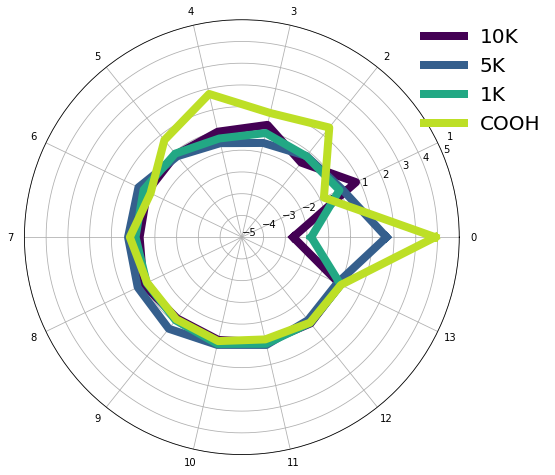

In [5]:
pca.plot_pca(dicti, savefig=True, labels=['10K', '5K', '1K', 'COOH'], rticks=np.linspace(-5, 5, 11), filename='pics/tissue_MW_pcaavg.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

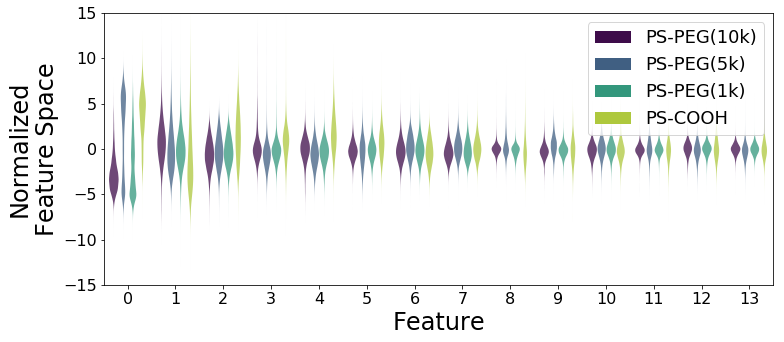

In [8]:
labels = types
labels2 = ['PS-PEG(10k)', 'PS-PEG(5k)', 'PS-PEG(1k)', 'PS-COOH']
feats = feature_violin(pcadataset.final, label='Particle Type', lvals=labels, labels=labels2, fsubset=14, yrange=[-15, 15],
                       legendfontsize=21, labelsize=24, fname='./pics/tissue_mw_pcadist.png')

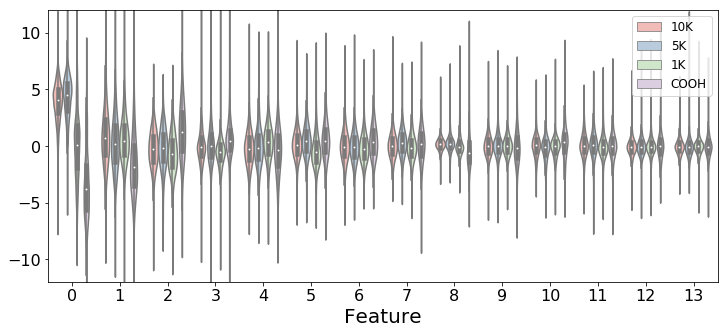

In [15]:
lvals = ['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label=featofvar, lvals=lvals, fsubset=ncomp, yrange=[-12, 12])

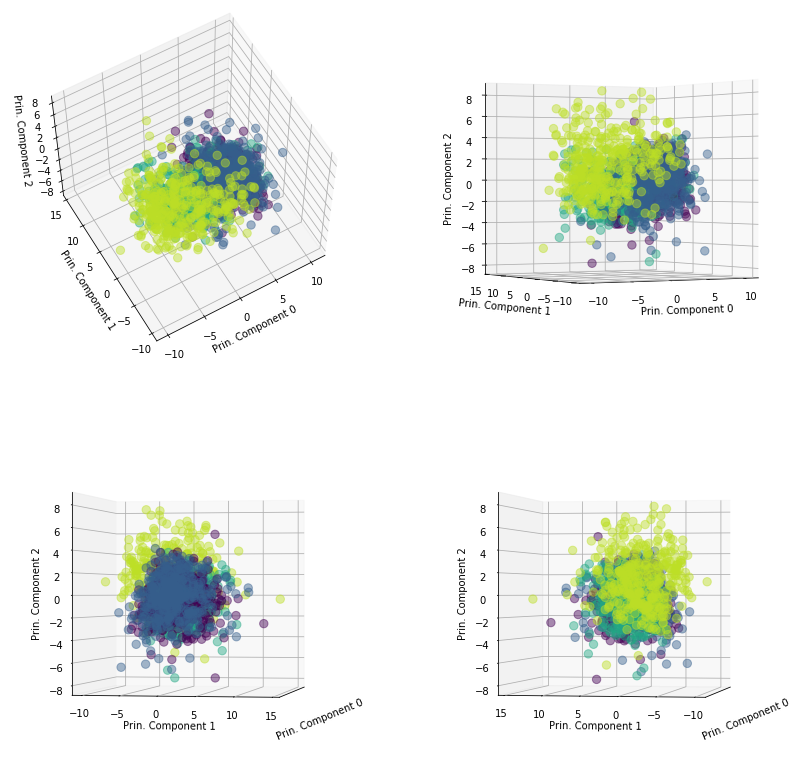

In [17]:
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label=featofvar, lvals=lvals, randcount=400, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

## Neural Network

In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [19]:
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.48035657
Validation score: 0.805407
Iteration 2, loss = 0.42126287
Validation score: 0.811554
Iteration 3, loss = 0.40705992
Validation score: 0.822115
Iteration 4, loss = 0.39797502
Validation score: 0.823376
Iteration 5, loss = 0.39173334
Validation score: 0.828342
Iteration 6, loss = 0.38662778
Validation score: 0.831021
Iteration 7, loss = 0.38208646
Validation score: 0.830864
Iteration 8, loss = 0.37824961
Validation score: 0.826056
Iteration 9, loss = 0.37517800
Validation score: 0.831888
Iteration 10, loss = 0.37138446
Validation score: 0.837169
Iteration 11, loss = 0.36766498
Validation score: 0.836066
Iteration 12, loss = 0.36466579
Validation score: 0.836460
Iteration 13, loss = 0.36199196
Validation score: 0.837721
Iteration 14, loss = 0.35881155
Validation score: 0.837957
Iteration 15, loss = 0.35634200
Validation score: 0.839849
Iteration 16, loss = 0.35326896
Validation score: 0.838982
Iteration 17, loss = 0.35076901
Validation score: 0.831888
Iterat

In [23]:
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.47831519
Validation score: 0.795555
Iteration 2, loss = 0.42082725
Validation score: 0.793742
Iteration 3, loss = 0.40708520
Validation score: 0.811318
Iteration 4, loss = 0.39850149
Validation score: 0.808875
Iteration 5, loss = 0.39230262
Validation score: 0.811633
Iteration 6, loss = 0.38691426
Validation score: 0.813288
Iteration 7, loss = 0.38238395
Validation score: 0.819593
Iteration 8, loss = 0.37822574
Validation score: 0.820697
Iteration 9, loss = 0.37408418
Validation score: 0.822667
Iteration 10, loss = 0.37096810
Validation score: 0.824165
Iteration 11, loss = 0.36744755
Validation score: 0.828893
Iteration 12, loss = 0.36469301
Validation score: 0.827554
Iteration 13, loss = 0.36106157
Validation score: 0.831967
Iteration 14, loss = 0.35784410
Validation score: 0.835277
Iteration 15, loss = 0.35518559
Validation score: 0.834016
Iteration 16, loss = 0.35247386
Validation score: 0.834568
Iteration 17, loss = 0.35024886
Validation score: 0.840400
Iterat

Text(0,0.5,'Validation Scores')

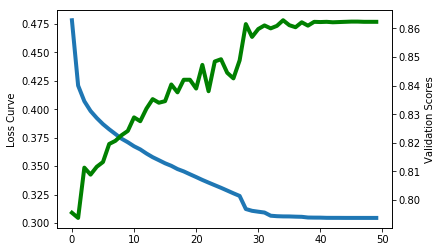

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [20]:
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].replace(['10K', '5K'], 'HI')

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.30981974
Validation score: 0.886822
Iteration 2, loss = 0.26150570
Validation score: 0.895098
Iteration 3, loss = 0.25052131
Validation score: 0.896989
Iteration 4, loss = 0.24294798
Validation score: 0.900615
Iteration 5, loss = 0.23768597
Validation score: 0.900457
Iteration 6, loss = 0.23291735
Validation score: 0.904871
Iteration 7, loss = 0.22932631
Validation score: 0.903846
Iteration 8, loss = 0.22564197
Validation score: 0.909127
Iteration 9, loss = 0.22210948
Validation score: 0.908417
Iteration 10, loss = 0.21964101
Validation score: 0.912122
Iteration 11, loss = 0.21706965
Validation score: 0.909521
Iteration 12, loss = 0.21485068
Validation score: 0.911649
Iteration 13, loss = 0.21254115
Validation score: 0.915117
Iteration 14, loss = 0.21047260
Validation score: 0.913146
Iteration 15, loss = 0.20839218
Validation score: 0.915195
Iteration 16, loss = 0.20630392
Validation score: 0.919530
Iteration 17, loss = 0.20446241
Validation score: 0.916772
Iterat

Text(0,0.5,'Validation Scores')

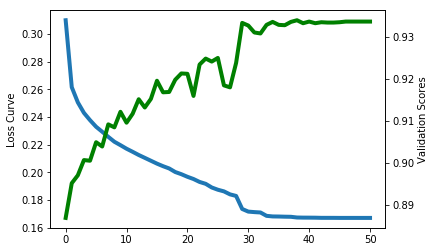

In [21]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [26]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='3'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '2'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='3'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.34965550
Validation score: 0.865543
Iteration 2, loss = 0.30310785
Validation score: 0.864628
Iteration 3, loss = 0.29019164
Validation score: 0.869097
Iteration 4, loss = 0.28245434
Validation score: 0.870389
Iteration 5, loss = 0.27607092
Validation score: 0.876851
Iteration 6, loss = 0.27054647
Validation score: 0.879974
Iteration 7, loss = 0.26594311
Validation score: 0.884820
Iteration 8, loss = 0.26152420
Validation score: 0.885520
Iteration 9, loss = 0.25706855
Validation score: 0.889128
Iteration 10, loss = 0.25309249
Validation score: 0.891444
Iteration 11, loss = 0.24909851
Validation score: 0.896398
Iteration 12, loss = 0.24584880
Validation score: 0.895536
Iteration 13, loss = 0.24221001
Validation score: 0.899844
Iteration 14, loss = 0.23823679
Validation score: 0.899305
Iteration 15, loss = 0.23471503
Validation score: 0.901405
Iteration 16, loss = 0.23149891
Validation score: 0.893167
Iteration 17, loss = 0.22823615
Validation score: 0.906790
Iterat

In [27]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.36119190
Validation score: 0.856850
Iteration 2, loss = 0.30415119
Validation score: 0.867063
Iteration 3, loss = 0.28929671
Validation score: 0.866036
Iteration 4, loss = 0.28099541
Validation score: 0.874304
Iteration 5, loss = 0.27496853
Validation score: 0.874358
Iteration 6, loss = 0.27037372
Validation score: 0.878411
Iteration 7, loss = 0.26638801
Validation score: 0.879168
Iteration 8, loss = 0.26284095
Validation score: 0.883491
Iteration 9, loss = 0.25939025
Validation score: 0.878952
Iteration 10, loss = 0.25636194
Validation score: 0.878087
Iteration 11, loss = 0.25312970
Validation score: 0.884950
Iteration 12, loss = 0.25083644
Validation score: 0.888246
Iteration 13, loss = 0.24775059
Validation score: 0.888949
Iteration 14, loss = 0.24497343
Validation score: 0.890948
Iteration 15, loss = 0.24239552
Validation score: 0.890030
Iteration 16, loss = 0.23997752
Validation score: 0.890732
Iteration 17, loss = 0.23757680
Validation score: 0.896406
Iterat

In [28]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='1'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 1.01784535
Validation score: 0.517440
Iteration 2, loss = 0.95550527
Validation score: 0.532388
Iteration 3, loss = 0.93691040
Validation score: 0.536987
Iteration 4, loss = 0.92365238
Validation score: 0.550211
Iteration 5, loss = 0.91231640
Validation score: 0.547336
Iteration 6, loss = 0.90133915
Validation score: 0.560751
Iteration 7, loss = 0.89176903
Validation score: 0.561326
Iteration 8, loss = 0.88226809
Validation score: 0.572058
Iteration 9, loss = 0.87205864
Validation score: 0.583940
Iteration 10, loss = 0.86276352
Validation score: 0.584707
Iteration 11, loss = 0.85367148
Validation score: 0.587581
Iteration 12, loss = 0.84481089
Validation score: 0.598122
Iteration 13, loss = 0.83676219
Validation score: 0.610387
Iteration 14, loss = 0.82568423
Validation score: 0.603105
Iteration 15, loss = 0.81795466
Validation score: 0.626485
Iteration 16, loss = 0.80785762
Validation score: 0.634918
Iteration 17, loss = 0.79984952
Validation score: 0.636067
Iterat

In [29]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.23305137
Validation score: 0.918076
Iteration 2, loss = 0.18334301
Validation score: 0.926452
Iteration 3, loss = 0.17039439
Validation score: 0.929857
Iteration 4, loss = 0.16338765
Validation score: 0.931424
Iteration 5, loss = 0.15825223
Validation score: 0.933099
Iteration 6, loss = 0.15484778
Validation score: 0.933694
Iteration 7, loss = 0.15162888
Validation score: 0.938773
Iteration 8, loss = 0.14904857
Validation score: 0.938773
Iteration 9, loss = 0.14640739
Validation score: 0.940394
Iteration 10, loss = 0.14435227
Validation score: 0.939746
Iteration 11, loss = 0.14208013
Validation score: 0.940394
Iteration 12, loss = 0.14039998
Validation score: 0.944610
Iteration 13, loss = 0.13861709
Validation score: 0.943799
Iteration 14, loss = 0.13679877
Validation score: 0.941475
Iteration 15, loss = 0.13458675
Validation score: 0.946177
Iteration 16, loss = 0.13339190
Validation score: 0.944772
Iteration 17, loss = 0.13147280
Validation score: 0.945907
Iterat

In [12]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='1'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.60303263
Validation score: 0.725182
Iteration 2, loss = 0.55769182
Validation score: 0.725374
Iteration 3, loss = 0.54775922
Validation score: 0.736297
Iteration 4, loss = 0.54094368
Validation score: 0.733039
Iteration 5, loss = 0.53555842
Validation score: 0.735914
Iteration 6, loss = 0.53097359
Validation score: 0.729207
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 7, loss = 0.52384093
Validation score: 0.739939
Iteration 8, loss = 0.52163238
Validation score: 0.741855
Iteration 9, loss = 0.52059371
Validation score: 0.742238
Iteration 10, loss = 0.51939573
Validation score: 0.739747
Iteration 11, loss = 0.51814910
Validation score: 0.745305
Iteration 12, loss = 0.51717036
Validation score: 0.746838
Iteration 13, loss = 0.51604789
Validation score: 0.749138
Iteration 14, loss = 0.51493541
Validation score: 0.747604
Iteration 15, loss = 0.51388778
Validation score: 0.746646
Iterat

In [13]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '1'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='3'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '1'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='3'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.21757584
Validation score: 0.928975
Iteration 2, loss = 0.17832665
Validation score: 0.935922
Iteration 3, loss = 0.16813908
Validation score: 0.937537
Iteration 4, loss = 0.16145795
Validation score: 0.939906
Iteration 5, loss = 0.15626056
Validation score: 0.939852
Iteration 6, loss = 0.15170548
Validation score: 0.942168
Iteration 7, loss = 0.14765302
Validation score: 0.945291
Iteration 8, loss = 0.14374095
Validation score: 0.948791
Iteration 9, loss = 0.14060552
Validation score: 0.945237
Iteration 10, loss = 0.13715347
Validation score: 0.946530
Iteration 11, loss = 0.13431309
Validation score: 0.949599
Iteration 12, loss = 0.13170297
Validation score: 0.946691
Iteration 13, loss = 0.12904146
Validation score: 0.954660
Iteration 14, loss = 0.12628190
Validation score: 0.956384
Iteration 15, loss = 0.12377986
Validation score: 0.951430
Iteration 16, loss = 0.12177071
Validation score: 0.954714
Iteration 17, loss = 0.11957971
Validation score: 0.957945
Iterat

Text(0,0.5,'Validation Scores')

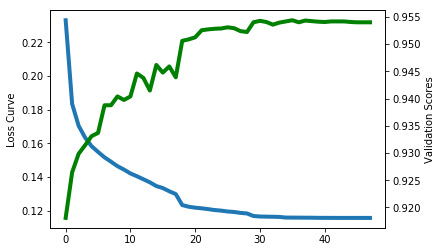

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [31]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].replace(['1K', '5K'], 'MID').values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].replace(['1K', '5K'], 'MID').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.23008825
Validation score: 0.907268
Iteration 2, loss = 0.19715399
Validation score: 0.908241
Iteration 3, loss = 0.19002165
Validation score: 0.908998
Iteration 4, loss = 0.18536089
Validation score: 0.911591
Iteration 5, loss = 0.18146011
Validation score: 0.914239
Iteration 6, loss = 0.17820713
Validation score: 0.912132
Iteration 7, loss = 0.17523376
Validation score: 0.914888
Iteration 8, loss = 0.17274548
Validation score: 0.915644
Iteration 9, loss = 0.17039610
Validation score: 0.915050
Iteration 10, loss = 0.16783102
Validation score: 0.919535
Iteration 11, loss = 0.16549746
Validation score: 0.920292
Iteration 12, loss = 0.16357235
Validation score: 0.923210
Iteration 13, loss = 0.16142061
Validation score: 0.922886
Iteration 14, loss = 0.15917245
Validation score: 0.922616
Iteration 15, loss = 0.15694512
Validation score: 0.924507
Iteration 16, loss = 0.15485230
Validation score: 0.924777
Iteration 17, loss = 0.15305720
Validation score: 0.927587
Iterat

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
pcadataset.final.hist(column=0, by='Region and Type', sharex=True, bins=np.linspace(-12, 12, 100),
                figsize=(9, 7), grid=False, layout=(6,1), sharey=True, )

In [ ]:
y_true2 = fstats_tot['Region and Type'].values
labels3 = ['PEG_Cortex', 'PEG_']

size3 = np.random.rand(len(y_true2))
y_pred2 = list(pd.cut(size3, bins=[0, 0.1667, 0.3333, 0.5, 0.66667, 0.83333, 10], labels=mws).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
0.75/0.16667